# Overview

In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
# from pmdarima.arima import auto_arima
# from gensim.models import KeyedVectors
# import spacy
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.feature_extraction.text import TfidfVectorizer
# from scipy.cluster.hierarchy import dendrogram
from pylab import rcParams
import re
from datetime import date
from catboost import Pool, CatBoostRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import holidays
from itertools import product
from xgboost import plot_importance


rcParams['figure.figsize'] = 10, 5
pd.options.mode.chained_assignment = None
%matplotlib inline

In [2]:
# items = pd.read_csv("./data/items.csv")
# shops = pd.read_csv("./data/shops.csv")
# item_categories = pd.read_csv("./data/item_categories.csv")
train = pd.read_csv("./data/sales_train.csv")
test = pd.read_csv("./data/test.csv")

In [4]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [7]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [6]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [8]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [9]:
# Check missing values
print("items:\n" + str(items.isna().sum()) + "\n")
print("train:\n" + str(train.isna().sum()) + "\n")
print("test:\n" + str(test.isna().sum()) + "\n")

items:
item_name           0
item_id             0
item_category_id    0
dtype: int64

train:
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

test:
ID         0
shop_id    0
item_id    0
dtype: int64



# Preprocessing

## train

In [10]:
print(f"The number of shops: {train['shop_id'].unique().shape[0]}")
print(f"The number of items: {train['item_id'].unique().shape[0]}")

The number of shops: 60
The number of items: 21807


### Format: date

In [3]:
train["date"] = pd.to_datetime(train["date"], format="%d.%m.%Y")

### Anomalies in item_price column

In [12]:
train[train['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,2013-05-15,4,32,2973,-1.0,1.0


In [13]:
train[(train['date'] == "2013-5-15") & (train['item_id'] == 2973)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
453034,2013-05-15,4,25,2973,1249.5,1.0
469026,2013-05-15,4,46,2973,1249.5,1.0
469951,2013-05-15,4,45,2973,1249.0,1.0
484683,2013-05-15,4,32,2973,-1.0,1.0


In [4]:
missing_price = train[(train['date'] == "2013-5-15") & (train['item_id'] == 2973) & (train['item_price'] > 0)]
train.loc[train['item_price'] < 0, "item_price"] = missing_price['item_price'].mean()

In [15]:
train[train['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


### Anomalies in item_cnt_day column

In [16]:
negative_train = train[train['item_cnt_day'] < 0]

In [17]:
# Statistics: item_price
train['item_price'].describe()

count    2.935849e+06
mean     8.908537e+02
std      1.729800e+03
min      7.000000e-02
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

In [18]:
# Statistics: item_price of records with item_cnt_day < 0
negative_train['item_price'].describe()

count     7356.000000
mean      1442.945623
std       2419.680132
min          0.500000
25%        349.000000
50%        799.000000
75%       1699.000000
max      33490.000000
Name: item_price, dtype: float64

In [5]:
train['item_cnt_day'] = np.where(train['item_cnt_day'] < 0, 0, train['item_cnt_day'])

### Date aggregation

In [6]:
train_g = train.groupby(by=['date_block_num', 'shop_id', 'item_id'])['item_cnt_day'].sum().to_frame('item_cnt_month').reset_index()
train_g

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
1609119,33,59,22087,6.0
1609120,33,59,22088,2.0
1609121,33,59,22091,1.0
1609122,33,59,22100,1.0


In [7]:
zeros = []
for i in range(34):
    sales = train_g[train_g['date_block_num']==i]
    zeros.append(np.array(list(product([i], sales.shop_id.unique(), sales.item_id.unique())), dtype='int16'))
    
zeros = pd.DataFrame(np.vstack(zeros), columns=['date_block_num','shop_id','item_id'])

train_g = zeros.merge(train_g, on=['date_block_num', 'shop_id', 'item_id'], how="left")
train_g = train_g.fillna(0)
train_g

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
10913845,33,59,5662,1.0
10913846,33,59,10068,1.0
10913847,33,59,12839,1.0
10913848,33,59,18275,1.0


## test

In [20]:
print(f"The number of shops in train data: {train['shop_id'].unique().shape[0]}")
print(f"The number of shops in test data: {test['shop_id'].unique().shape[0]}")

The number of shops in train data: 60
The number of shops in test data: 42


In [21]:
print("Items appear in test set but not in train set:")
len(set(test["item_id"].unique().tolist()) - set(train["item_id"].unique().tolist()))

Items appear in test set but not in train set:


363

## shop

According to discussion in kaggle, some shops are similar to each other possibly due to re-opening. 

In [8]:
train.loc[train['shop_id'] == 0, 'shop_id'] = 57
test.loc[test['shop_id'] == 0, 'shop_id'] = 57

train.loc[train['shop_id'] == 1, 'shop_id'] = 58
test.loc[test['shop_id'] == 1, 'shop_id'] = 58

train.loc[train['shop_id'] == 10, 'shop_id'] = 11
test.loc[test['shop_id'] == 10, 'shop_id'] = 11

# Feature Engineering

## Text Embeddings

In [10]:
ru_model = KeyedVectors.load_word2vec_format('../wiki.ru.vec')

In [11]:
def extract_feature(text_col):
    features = list()
    len_lst = list()
    nlp = spacy.load("ru_core_news_lg")
    fail_count = 0
    
    for i in tqdm(range(text_col.shape[0])):
        one_feature = list()
        tokens = nlp (text_col[i])
        for token in tokens:
            try:
                one_feature.append(ru_model.get_vector(token.text))
            except:
                continue
        if len(one_feature) > 0:
            one_feature = np.stack(one_feature).flatten()
        else:
            one_feature = np.zeros(300)
            fail_count += 1
        features.append(one_feature)
        len_lst.append(one_feature.shape[0])
        
    med = int(pd.Series(len_lst).max())
    print(f"Max: {med}")
    feature_tp = list()
    for item in features:
        if item.shape[0] < med:
            item = np.concatenate([item, np.zeros(med - item.shape[0])])
        else:
            item = item[:med]
        feature_tp.append(item)
    
    print(f"Failed: {fail_count}")
    features = np.stack(feature_tp)
    return features

In [12]:
def encoding_cate(ser, num):
    ser_df = ser.value_counts().to_frame('count').reset_index()
    ser_df = ser_df.loc[ser_df['count'] > num, 'index']
    print(f"The number of classes: {ser_df.shape[0] + 1}")
    ser_df = pd.DataFrame({"cate": ser_df.tolist(), "index": list(range(ser_df.shape[0], 0, -1))})
    return ser.to_frame('cate').merge(ser_df, on='cate', how='left').fillna(0)['index'].astype(int)

### item_categories

In [13]:
item_categories_feature = extract_feature(item_categories['item_category_name'])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 272.54it/s]

Max: 1800
Failed: 1


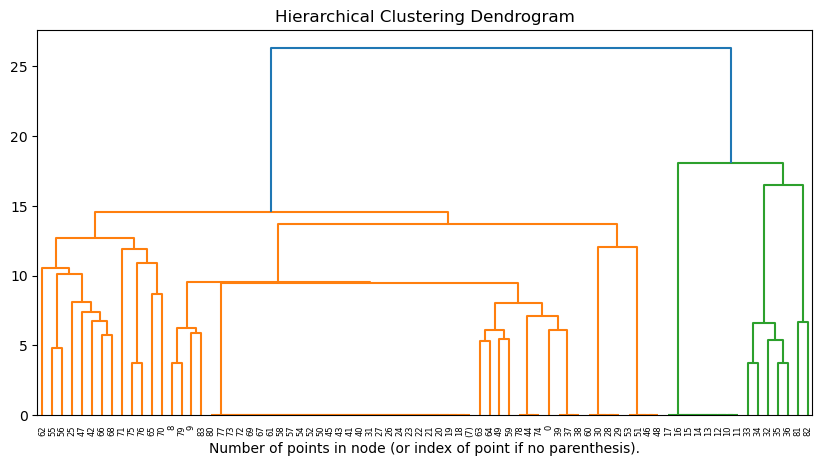

In [14]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)


clustering = AgglomerativeClustering(distance_threshold=8, n_clusters=None).fit(item_categories_feature)

plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering, truncate_mode="level")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [15]:
print(f"The number of classes: {np.unique(clustering.labels_).shape[0]}")
print(f"Check the shape of labels: {clustering.labels_.shape[0]}")
print(f"Labels: {clustering.labels_}")

The number of classes: 17
Check the shape of labels: 84
Labels: [ 2  6  6  6  6  6  6  6  5  5 11 11 11 11 11 11 11 11  6  6  6  6  6  6
  6 15  6  6 16 16 16  6  3  3  3  3  3  2  2  2  6  6  0  6  2  6  9  0
  9  7  6  9  6  9  6 12 12  6  6  7 16  6 10  7  7 14  0  6  0  6 13  8
  6  6  2  4  4  6  2  5  6  1  1  5]


In [16]:
item_categories['item_category_te'] = clustering.labels_
item_categories = item_categories.drop(columns=['item_category_name'])
item_categories

,item_category_id,item_category_te
0,0,2
1,1,6
2,2,6
3,3,6
4,4,6
...,...,...
79,79,5
80,80,6
81,81,1
82,82,1


In [17]:
cols = ["category_1", "category_2"]
item_categories_tfidf = pd.read_csv("./sales/_item_categories.csv", 
                                    usecols=["item_category_id", "category_1", "category_2"])

for col in cols:
    value_map = dict((v,i) for i,v in enumerate(item_categories_tfidf[col].unique()))
    item_categories_tfidf = item_categories_tfidf.replace({col:value_map})

item_categories_tfidf.head()

,item_category_id,category_1,category_2
0,0,0,0
1,1,1,1
2,2,1,2
3,3,1,3
4,4,1,4


### shops

In [18]:
shops_feature = extract_feature(shops['shop_name'])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 167.43it/s]

Max: 1500
Failed: 2


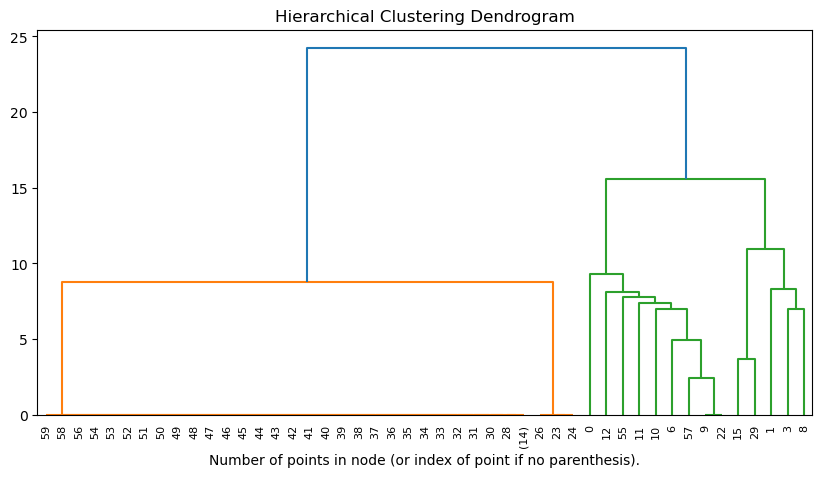

In [19]:
clustering = AgglomerativeClustering(distance_threshold=5, n_clusters=None).fit(shops_feature)

plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering, truncate_mode="level")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [20]:
print(f"The number of classes: {np.unique(clustering.labels_).shape[0]}")
print(f"Check the shape of labels: {clustering.labels_.shape[0]}")
print(f"Labels: {clustering.labels_}")

The number of classes: 12
Check the shape of labels: 60
Labels: [ 9  6  5 11  5  5  0  5  8  0 10  4  7  5  5  1  5  5  5  5  5  5  0  2
  2  5  2  5  5  1  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  3  5  0  5  5]


In [21]:
shop_name = shops['shop_name'].str.split(pat=' ', n=2)
def remove_stopping_words(lst):
    new_lst = list()
    for i in lst:
        i = i.strip(',?!"()')
        i = re.sub('"', '', i)
        i = re.sub('\(', '', i)
        if i != "":
            new_lst.append(i)
    return new_lst

shop_name_split = shop_name.apply(remove_stopping_words)
shop_city = shop_name_split.apply(lambda x: x[0])
shop_info = shop_name_split.apply(lambda x: x[1])

In [22]:
shops['city'] = encoding_cate(shop_city, 0)
shops['info'] = encoding_cate(shop_info, 1)
shops['shop_te'] = clustering.labels_
shops = shops.drop(columns=['shop_name'])
shops.head()

The number of classes: 32
The number of classes: 7


,shop_id,city,info,shop_te
0,0,30,2,9
1,1,30,6,6
2,2,10,6,5
3,3,2,4,11
4,4,3,6,5


In [23]:
cols = ["shop_kind", "city", "shop_brand"]
shops_tfidf = pd.read_csv("./sales/_shops.csv", usecols=["shop_id", "shop_kind", "city", "shop_brand"])

for col in cols:
    value_map = dict((v,i) for i,v in enumerate(shops_tfidf[col].unique()))
    shops_tfidf = shops_tfidf.replace({col:value_map})

shops_tfidf = shops_tfidf.rename(columns={'city': 'city2'})
shops_tfidf.head()

,shop_id,city2,shop_kind,shop_brand
0,0,0,0,0
1,1,0,1,1
2,2,1,1,2
3,3,2,2,3
4,4,3,1,4


### items

In [24]:
# The first word in item name
first_word = items['item_name'].str.split(pat=' ').apply(lambda x: x[0])
first_word = encoding_cate(first_word, 3)

The number of classes: 1224


In [25]:
# Information about the item in ()
def trans_lst(col):
    if len(col) > 0:
        item = col[0]
        item = item.lower()
        item = re.sub("\s", "", item)
        item = item.strip("\[\s\t\n")
    else:
        item = ""
    return item

item_addons = items['item_name'].str.findall(r'\((.+?)\)').apply(trans_lst)
item_addons = encoding_cate(item_addons, 5)

The number of classes: 116


In [26]:
# Information about the item in []
item_addons_2 = items['item_name'].str.findall(r'\[(.+?)[,\]...]').apply(trans_lst)
item_addons_2 = encoding_cate(item_addons_2, 10)

The number of classes: 14


In [27]:
items['first_word'] = first_word
items['item_addons'] = item_addons
items['item_addons_2'] = item_addons_2
items = items.drop(columns=['item_name'])
items

,item_id,item_category_id,first_word,item_addons,item_addons_2
0,0,40,0,0,13
1,1,76,0,115,12
2,2,40,0,0,13
3,3,40,0,0,13
4,4,40,0,38,13
...,...,...,...,...,...
22165,22165,31,0,115,12
22166,22166,54,0,115,9
22167,22167,49,0,81,13
22168,22168,62,0,115,13


In [27]:
# items_tfidf = pd.read_csv("./sales/items.csv")
# feature_count = 25
# tfidf = TfidfVectorizer(max_features=feature_count)
# items_df_item_name_text_features = tfidf.fit_transform(items_tfidf['item_name']).toarray().tolist()
# items_tfidf["item_names_tf_idf"] = items_df_item_name_text_features
# items_tfidf.drop('item_name', axis = 1, inplace = True)
# items_tfidf

## Structural Embeddings

### Date

In [9]:
holiday = pd.date_range(start='2013-01-01', end='2015-11-30').to_series().apply(lambda x: int(x in holidays.Russia()))
holiday = holiday.to_frame('check').reset_index()

def map_date_block_num(col):
    block = dict(list(enumerate(product(holiday['index'].dt.year.unique().tolist(), 
                                holiday['index'].dt.month.unique().tolist()))))
    block = {v: k for k, v in block.items()}
    key = (col.year, col.month)
    return block[key]

holiday['date_block_num'] = holiday['index'].apply(map_date_block_num)
holiday = holiday.groupby(by='date_block_num')['check'].sum().to_frame('n_holidays').reset_index()

In [10]:
day_of_week = pd.date_range(start='2013-01-01', end='2015-11-30').to_series().dt.isocalendar().day.to_frame('day').reset_index()

def map_date_block_num(col):
    block = dict(list(enumerate(product(day_of_week['index'].dt.year.unique().tolist(), 
                                day_of_week['index'].dt.month.unique().tolist()))))
    block = {v: k for k, v in block.items()}
    key = (col.year, col.month)
    return block[key]
day_of_week['date_block_num'] = day_of_week['index'].apply(map_date_block_num)
for i in range(1, 8):
    day_of_week[f'day_{i}'] = (day_of_week['day'] == i).astype(int)
    
day_of_week = day_of_week.drop(columns=['index', 'day']).groupby(by=['date_block_num']).sum().reset_index()

In [11]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['quarter'] = train['date'].dt.quarter
train['daysinmonth'] = train['date'].dt.daysinmonth
train['is_busday'] = np.is_busday(train['date'].dt.date.tolist()).astype(int)
train_busdays = train.loc[:, ['date', 'date_block_num', 'is_busday']].drop_duplicates()
train = train.merge(train_busdays.groupby(by=['date_block_num'])['is_busday'].sum().to_frame('n_busdays'),
                    on='date_block_num',
                    how='left')
date_meta = train.drop(columns=['date', 'shop_id', 'item_id', 'item_price', 'item_cnt_day', 'is_busday'])
date_meta = date_meta.drop_duplicates()

In [12]:
train_g = train_g.merge(holiday, on='date_block_num', how='left')
train_g = train_g.merge(day_of_week, on='date_block_num', how='left')
train_g = train_g.merge(date_meta, on=['date_block_num'], how='left')
train_g

,date_block_num,shop_id,item_id,item_cnt_month,n_holidays,day_1,day_2,day_3,day_4,day_5,day_6,day_7,year,month,quarter,daysinmonth,n_busdays
0,0,0,32,6.0,8,4,5,5,5,4,4,4,2013,1,1,31,23
1,0,0,33,3.0,8,4,5,5,5,4,4,4,2013,1,1,31,23
2,0,0,35,1.0,8,4,5,5,5,4,4,4,2013,1,1,31,23
3,0,0,43,1.0,8,4,5,5,5,4,4,4,2013,1,1,31,23
4,0,0,51,2.0,8,4,5,5,5,4,4,4,2013,1,1,31,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10913845,33,59,5662,1.0,0,4,4,4,5,5,5,4,2015,10,4,31,22
10913846,33,59,10068,1.0,0,4,4,4,5,5,5,4,2015,10,4,31,22
10913847,33,59,12839,1.0,0,4,4,4,5,5,5,4,2015,10,4,31,22
10913848,33,59,18275,1.0,0,4,4,4,5,5,5,4,2015,10,4,31,22


In [13]:
test['date_block_num'] = 34
test['year'] = 2015
test['month'] = 11
test['quarter'] = 4
test['daysinmonth'] = 30
test['n_busdays'] = np.busday_count('2015-11', '2015-12')
test = test.merge(holiday, on='date_block_num', how='left')
test = test.merge(day_of_week, on='date_block_num', how='left')
test

,ID,shop_id,item_id,date_block_num,year,month,quarter,daysinmonth,n_busdays,n_holidays,day_1,day_2,day_3,day_4,day_5,day_6,day_7
0,0,5,5037,34,2015,11,4,30,21,1,5,4,4,4,4,4,5
1,1,5,5320,34,2015,11,4,30,21,1,5,4,4,4,4,4,5
2,2,5,5233,34,2015,11,4,30,21,1,5,4,4,4,4,4,5
3,3,5,5232,34,2015,11,4,30,21,1,5,4,4,4,4,4,5
4,4,5,5268,34,2015,11,4,30,21,1,5,4,4,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,34,2015,11,4,30,21,1,5,4,4,4,4,4,5
214196,214196,45,16188,34,2015,11,4,30,21,1,5,4,4,4,4,4,5
214197,214197,45,15757,34,2015,11,4,30,21,1,5,4,4,4,4,4,5
214198,214198,45,19648,34,2015,11,4,30,21,1,5,4,4,4,4,4,5


### Price

In [14]:
# price median
price_med = train.loc[:, ['item_id', 'item_price']].groupby(by=['item_id']).median().reset_index()
price_med = price_med.rename(columns={'item_price': 'item_price_med'})
train = train_g.merge(price_med, on='item_id', how='left')
test = test.merge(price_med, on='item_id', how='left')

In [15]:
# price date median
price_med_date = train.loc[:, ['date_block_num', 'item_id', 'item_price_med']]
price_med_date = price_med_date.groupby(by=['date_block_num', 'item_id']).median().reset_index()
price_med_date = price_med_date.rename(columns={'item_price_med': 'item_price_med_date'})
train = train_g.merge(price_med_date, on=['date_block_num', 'item_id'], how='left')
test = test.merge(price_med_date, on=['date_block_num', 'item_id'], how='left')

In [16]:
# price-item lag
for lag in [1, 2, 3, 4, 5, 6, 12]:
    sales = train.loc[:, ['date_block_num', 'shop_id', 'item_id', 'item_price_med_date']]
    sales = sales.groupby(by=['date_block_num', 'shop_id', 'item_id']).mean().reset_index()
    sales['date_block_num'] = sales['date_block_num'] + lag
    sales = sales.rename(columns={'item_price_med_date': f'item_price_med_date_lag{lag}'})
    sales = sales[sales['date_block_num'] <= 34]
    train = train.merge(sales, on=['date_block_num', 'shop_id', 'item_id'], how='left')
    test = test.merge(sales, on=['date_block_num', 'shop_id', 'item_id'], how='left')

In [17]:
train

,date_block_num,shop_id,item_id,item_cnt_month,n_holidays,day_1,day_2,day_3,day_4,day_5,...,daysinmonth,n_busdays,item_price_med_date,item_price_med_date_lag1,item_price_med_date_lag2,item_price_med_date_lag3,item_price_med_date_lag4,item_price_med_date_lag5,item_price_med_date_lag6,item_price_med_date_lag12
0,0,0,32,6.0,8,4,5,5,5,4,...,31,23,221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,33,3.0,8,4,5,5,5,4,...,31,23,199.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,35,1.0,8,4,5,5,5,4,...,31,23,399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,43,1.0,8,4,5,5,5,4,...,31,23,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,51,2.0,8,4,5,5,5,4,...,31,23,249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10913845,33,59,5662,1.0,0,4,4,4,5,5,...,31,22,549.0,549.0,549.0,549.0,549.0,549.0,549.0,549.0
10913846,33,59,10068,1.0,0,4,4,4,5,5,...,31,22,149.0,NaN,NaN,NaN,NaN,NaN,NaN,149.0
10913847,33,59,12839,1.0,0,4,4,4,5,5,...,31,22,149.0,149.0,149.0,149.0,149.0,149.0,149.0,149.0
10913848,33,59,18275,1.0,0,4,4,4,5,5,...,31,22,199.0,199.0,NaN,199.0,199.0,199.0,199.0,199.0


In [18]:
test

,ID,shop_id,item_id,date_block_num,year,month,quarter,daysinmonth,n_busdays,n_holidays,...,day_7,item_price_med,item_price_med_date,item_price_med_date_lag1,item_price_med_date_lag2,item_price_med_date_lag3,item_price_med_date_lag4,item_price_med_date_lag5,item_price_med_date_lag6,item_price_med_date_lag12
0,0,5,5037,34,2015,11,4,30,21,1,...,5,1999.0,NaN,1999.0,1999.0,1999.0,1999.0,1999.0,1999.0,1999.0
1,1,5,5320,34,2015,11,4,30,21,1,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,34,2015,11,4,30,21,1,...,5,599.5,NaN,599.5,599.5,599.5,599.5,599.5,599.5,NaN
3,3,5,5232,34,2015,11,4,30,21,1,...,5,599.5,NaN,599.5,599.5,599.5,NaN,NaN,NaN,NaN
4,4,5,5268,34,2015,11,4,30,21,1,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,34,2015,11,4,30,21,1,...,5,199.0,NaN,199.0,199.0,199.0,199.0,199.0,199.0,NaN
214196,214196,45,16188,34,2015,11,4,30,21,1,...,5,1223.0,NaN,1223.0,1223.0,NaN,NaN,NaN,NaN,NaN
214197,214197,45,15757,34,2015,11,4,30,21,1,...,5,199.0,NaN,199.0,199.0,199.0,199.0,199.0,199.0,199.0
214198,214198,45,19648,34,2015,11,4,30,21,1,...,5,99.0,NaN,99.0,99.0,99.0,99.0,99.0,99.0,NaN


### Release Date

In [19]:
release = pd.concat([train_g.loc[:, ['date_block_num', 'item_id']],
                    test.loc[:, ['date_block_num', 'item_id']]])
release = release.groupby(by=['item_id']).min().reset_index()
release = release.rename(columns={'date_block_num': 'release_date'})
train = train.merge(release, on='item_id', how='left')
test = test.merge(release, on='item_id', how='left')

In [20]:
train

,date_block_num,shop_id,item_id,item_cnt_month,n_holidays,day_1,day_2,day_3,day_4,day_5,...,n_busdays,item_price_med_date,item_price_med_date_lag1,item_price_med_date_lag2,item_price_med_date_lag3,item_price_med_date_lag4,item_price_med_date_lag5,item_price_med_date_lag6,item_price_med_date_lag12,release_date
0,0,0,32,6.0,8,4,5,5,5,4,...,23,221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0,0,33,3.0,8,4,5,5,5,4,...,23,199.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0,0,35,1.0,8,4,5,5,5,4,...,23,399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,0,0,43,1.0,8,4,5,5,5,4,...,23,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0,0,51,2.0,8,4,5,5,5,4,...,23,249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10913845,33,59,5662,1.0,0,4,4,4,5,5,...,22,549.0,549.0,549.0,549.0,549.0,549.0,549.0,549.0,21
10913846,33,59,10068,1.0,0,4,4,4,5,5,...,22,149.0,NaN,NaN,NaN,NaN,NaN,NaN,149.0,1
10913847,33,59,12839,1.0,0,4,4,4,5,5,...,22,149.0,149.0,149.0,149.0,149.0,149.0,149.0,149.0,0
10913848,33,59,18275,1.0,0,4,4,4,5,5,...,22,199.0,199.0,NaN,199.0,199.0,199.0,199.0,199.0,17


In [21]:
test

,ID,shop_id,item_id,date_block_num,year,month,quarter,daysinmonth,n_busdays,n_holidays,...,item_price_med,item_price_med_date,item_price_med_date_lag1,item_price_med_date_lag2,item_price_med_date_lag3,item_price_med_date_lag4,item_price_med_date_lag5,item_price_med_date_lag6,item_price_med_date_lag12,release_date
0,0,5,5037,34,2015,11,4,30,21,1,...,1999.0,NaN,1999.0,1999.0,1999.0,1999.0,1999.0,1999.0,1999.0,20
1,1,5,5320,34,2015,11,4,30,21,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
2,2,5,5233,34,2015,11,4,30,21,1,...,599.5,NaN,599.5,599.5,599.5,599.5,599.5,599.5,NaN,27
3,3,5,5232,34,2015,11,4,30,21,1,...,599.5,NaN,599.5,599.5,599.5,NaN,NaN,NaN,NaN,31
4,4,5,5268,34,2015,11,4,30,21,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,34,2015,11,4,30,21,1,...,199.0,NaN,199.0,199.0,199.0,199.0,199.0,199.0,NaN,23
214196,214196,45,16188,34,2015,11,4,30,21,1,...,1223.0,NaN,1223.0,1223.0,NaN,NaN,NaN,NaN,NaN,32
214197,214197,45,15757,34,2015,11,4,30,21,1,...,199.0,NaN,199.0,199.0,199.0,199.0,199.0,199.0,199.0,0
214198,214198,45,19648,34,2015,11,4,30,21,1,...,99.0,NaN,99.0,99.0,99.0,99.0,99.0,99.0,NaN,23


### Sales Lag

In [22]:
# train = pd.read_pickle("./data/train.pkl")
# test = pd.read_pickle("./data/test.pkl")
items = pd.read_pickle("./data/items.pkl")
item_categories = pd.read_pickle("./data/item_categories.pkl")
item_categories_tfidf = pd.read_pickle("./data/item_categories_tfidf.pkl")
shops = pd.read_pickle("./data/shops.pkl")
shops_tfidf = pd.read_pickle("./data/shops_tfidf.pkl")

In [23]:
# item sum
for lag in [1, 2, 3, 4, 5, 6, 12]:
    sales = train.loc[:, ['date_block_num', 'item_id', 'item_cnt_month']]
    sales = sales.groupby(by=['date_block_num', 'item_id']).sum().reset_index()
    sales['date_block_num'] = sales['date_block_num'] + lag
    sales = sales.rename(columns={'item_cnt_month': f'item_sales_lag{lag}'})
    sales = sales[sales['date_block_num'] <= 34]
    train = train.merge(sales, on=['date_block_num', 'item_id'], how='left')
    test = test.merge(sales, on=['date_block_num', 'item_id'], how='left')

In [24]:
# Merge
train = train.merge(items, on='item_id', how='left')
test = test.merge(items, on='item_id', how='left')
train = train.merge(item_categories, on='item_category_id', how='left')
test = test.merge(item_categories, on='item_category_id', how='left')
train = train.merge(item_categories_tfidf, on='item_category_id', how='left')
test = test.merge(item_categories_tfidf, on='item_category_id', how='left')
train = train.merge(shops, on='shop_id', how='left')
test = test.merge(shops, on='shop_id', how='left')
train = train.merge(shops_tfidf, on='shop_id', how='left')
test = test.merge(shops_tfidf, on='shop_id', how='left')
# train = train.merge(items_tfidf, on=['item_id', 'item_category_id'], how='left')
# test = test.merge(items_tfidf, on=['item_id', 'item_category_id'], how='left')

In [25]:
train.to_pickle("./data/train.pkl")
test.to_pickle("./data/test.pkl")

In [2]:
train = pd.read_pickle("./data/train.pkl")
test = pd.read_pickle("./data/test.pkl")

In [3]:
# item-shop mean
for lag in [1, 2, 3, 4, 5, 6, 12]:
    sales = train.loc[:, ['date_block_num', 'shop_id', 'item_id', 'item_cnt_month']]
    sales = sales.groupby(by=['date_block_num', 'shop_id', 'item_id']).mean().reset_index()
    sales['date_block_num'] = sales['date_block_num'] + lag
    sales = sales.rename(columns={'item_cnt_month': f'item_shop_sales_lag{lag}'})
    sales = sales[sales['date_block_num'] <= 34]
    train = train.merge(sales, on=['date_block_num', 'shop_id', 'item_id'], how='left')
    test = test.merge(sales, on=['date_block_num', 'shop_id', 'item_id'], how='left')

In [4]:
# shop sum
for lag in [1, 2, 3, 4, 5, 6, 12]:
    sales = train.loc[:, ['date_block_num', 'shop_id', 'item_cnt_month']]
    sales = sales.groupby(by=['date_block_num', 'shop_id']).sum().reset_index()
    sales['date_block_num'] = sales['date_block_num'] + lag
    sales = sales.rename(columns={'item_cnt_month': f'shop_sales_lag{lag}'})
    sales = sales[sales['date_block_num'] <= 34]
    train = train.merge(sales, on=['date_block_num', 'shop_id'], how='left')
    test = test.merge(sales, on=['date_block_num', 'shop_id'], how='left')

In [5]:
# city sum
for lag in [1, 2, 3, 4, 5, 6, 12]:
    sales = train.loc[:, ['date_block_num', 'city', 'item_cnt_month']]
    sales = sales.groupby(by=['date_block_num', 'city']).sum().reset_index()
    sales['date_block_num'] = sales['date_block_num'] + lag
    sales = sales.rename(columns={'item_cnt_month': f'city_sales_lag{lag}'})
    sales = sales[sales['date_block_num'] <= 34]
    train = train.merge(sales, on=['date_block_num', 'city'], how='left')
    test = test.merge(sales, on=['date_block_num', 'city'], how='left')

In [6]:
# category sum
for lag in [1, 2, 3, 4, 5, 6, 12]:
    sales = train.loc[:, ['date_block_num', 'item_category_id', 'item_cnt_month']]
    sales = sales.groupby(by=['date_block_num', 'item_category_id']).sum().reset_index()
    sales['date_block_num'] = sales['date_block_num'] + lag
    sales = sales.rename(columns={'item_cnt_month': f'item_category_id_sales_lag{lag}'})
    sales = sales[sales['date_block_num'] <= 34]
    train = train.merge(sales, on=['date_block_num', 'item_category_id'], how='left')
    test = test.merge(sales, on=['date_block_num', 'item_category_id'], how='left')

In [7]:
# shop category mean
for lag in [1, 2, 3, 4, 5, 6, 12]:
    sales = train.loc[:, ['date_block_num', 'shop_id', 'item_category_id', 'item_cnt_month']]
    sales = sales.groupby(by=['date_block_num', 'shop_id', 'item_category_id']).mean().reset_index()
    sales['date_block_num'] = sales['date_block_num'] + lag
    sales = sales.rename(columns={'item_cnt_month': f'shop_cat_sales_lag{lag}'})
    sales = sales[sales['date_block_num'] <= 34]
    train = train.merge(sales, on=['date_block_num', 'shop_id', 'item_category_id'], how='left')
    test = test.merge(sales, on=['date_block_num', 'shop_id', 'item_category_id'], how='left')

In [8]:
# shop category_te mean
for lag in [1, 2, 3, 4, 5, 6, 12]:
    sales = train.loc[:, ['date_block_num', 'shop_id', 'item_category_te', 'item_cnt_month']]
    sales = sales.groupby(by=['date_block_num', 'shop_id', 'item_category_te']).mean().reset_index()
    sales['date_block_num'] = sales['date_block_num'] + lag
    sales = sales.rename(columns={'item_cnt_month': f'shop_cat_te_sales_lag{lag}'})
    sales = sales[sales['date_block_num'] <= 34]
    train = train.merge(sales, on=['date_block_num', 'shop_id', 'item_category_te'], how='left')
    test = test.merge(sales, on=['date_block_num', 'shop_id', 'item_category_te'], how='left')

In [9]:
train

,date_block_num,shop_id,item_id,item_cnt_month,n_holidays,day_1,day_2,day_3,day_4,day_5,...,shop_cat_sales_lag5,shop_cat_sales_lag6,shop_cat_sales_lag12,shop_cat_te_sales_lag1,shop_cat_te_sales_lag2,shop_cat_te_sales_lag3,shop_cat_te_sales_lag4,shop_cat_te_sales_lag5,shop_cat_te_sales_lag6,shop_cat_te_sales_lag12
0,0,0,32,6.0,8,4,5,5,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,33,3.0,8,4,5,5,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,35,1.0,8,4,5,5,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,43,1.0,8,4,5,5,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,51,2.0,8,4,5,5,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10913845,33,59,5662,1.0,0,4,4,4,5,5,...,0.260870,0.250000,0.772727,0.147418,0.172585,0.125171,0.132628,0.140345,0.118294,0.134632
10913846,33,59,10068,1.0,0,4,4,4,5,5,...,0.043222,0.128458,0.090782,0.106422,0.111888,0.087928,0.094901,0.041667,0.109859,0.081420
10913847,33,59,12839,1.0,0,4,4,4,5,5,...,0.140351,0.140657,0.120072,0.147418,0.172585,0.125171,0.132628,0.140345,0.118294,0.134632
10913848,33,59,18275,1.0,0,4,4,4,5,5,...,0.157593,0.147059,0.130277,0.099554,0.122271,0.144828,0.120739,0.152355,0.142091,0.123570


In [10]:
test

,ID,shop_id,item_id,date_block_num,year,month,quarter,daysinmonth,n_busdays,n_holidays,...,shop_cat_sales_lag5,shop_cat_sales_lag6,shop_cat_sales_lag12,shop_cat_te_sales_lag1,shop_cat_te_sales_lag2,shop_cat_te_sales_lag3,shop_cat_te_sales_lag4,shop_cat_te_sales_lag5,shop_cat_te_sales_lag6,shop_cat_te_sales_lag12
0,0,5,5037,34,2015,11,4,30,21,1,...,0.432927,0.438596,0.392857,0.151136,0.181133,0.225852,0.153899,0.147443,0.154414,0.189065
1,1,5,5320,34,2015,11,4,30,21,1,...,0.170370,0.154728,0.167089,0.154950,0.130758,0.209607,0.162759,0.166193,0.153740,0.159613
2,2,5,5233,34,2015,11,4,30,21,1,...,0.432927,0.438596,0.392857,0.151136,0.181133,0.225852,0.153899,0.147443,0.154414,0.189065
3,3,5,5232,34,2015,11,4,30,21,1,...,0.360000,0.340000,0.503185,0.151136,0.181133,0.225852,0.153899,0.147443,0.154414,0.189065
4,4,5,5268,34,2015,11,4,30,21,1,...,0.535354,0.895833,2.318841,0.151136,0.181133,0.225852,0.153899,0.147443,0.154414,0.189065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,34,2015,11,4,30,21,1,...,0.090370,0.127507,0.156962,0.126255,0.072808,0.104803,0.126897,0.092330,0.127424,0.160822
214196,214196,45,16188,34,2015,11,4,30,21,1,...,0.107843,0.101010,0.207792,0.108187,0.097484,0.155063,0.189711,0.071197,0.068627,0.173145
214197,214197,45,15757,34,2015,11,4,30,21,1,...,0.090370,0.127507,0.156962,0.126255,0.072808,0.104803,0.126897,0.092330,0.127424,0.160822
214198,214198,45,19648,34,2015,11,4,30,21,1,...,0.068765,0.082237,0.114490,0.090550,0.120158,0.109375,0.086525,0.095591,0.107281,0.155396


In [11]:
# Check missing values
print("train:\n" + str(train.isna().sum()) + "\n")
print("test:\n" + str(test.isna().sum()) + "\n")

train:
date_block_num                   0
shop_id                          0
item_id                          0
item_cnt_month                   0
n_holidays                       0
                            ...   
shop_cat_te_sales_lag3     1392492
shop_cat_te_sales_lag4     1824706
shop_cat_te_sales_lag5     2249408
shop_cat_te_sales_lag6     2668370
shop_cat_te_sales_lag12    5051577
Length: 88, dtype: int64

test:
ID                             0
shop_id                        0
item_id                        0
date_block_num                 0
year                           0
                           ...  
shop_cat_te_sales_lag3     10200
shop_cat_te_sales_lag4     10200
shop_cat_te_sales_lag5     10200
shop_cat_te_sales_lag6     10200
shop_cat_te_sales_lag12    16640
Length: 89, dtype: int64



In [12]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [13]:
# Prepare train/test data
train_y = train['item_cnt_month'].clip(0, 20)
train = train.drop(columns=['item_cnt_month'])
# train = train.drop(columns=['item_names_tf_idf'])
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10913850 entries, 0 to 10913849
Data columns (total 87 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   date_block_num                int16  
 1   shop_id                       int16  
 2   item_id                       int16  
 3   n_holidays                    int64  
 4   day_1                         int64  
 5   day_2                         int64  
 6   day_3                         int64  
 7   day_4                         int64  
 8   day_5                         int64  
 9   day_6                         int64  
 10  day_7                         int64  
 11  year                          int64  
 12  month                         int64  
 13  quarter                       int64  
 14  daysinmonth                   int64  
 15  n_busdays                     int64  
 16  item_price_med_date           float64
 17  item_price_med_date_lag1      float64
 18  item_price_med_date_

In [14]:
test = test.drop(columns=['ID'])#, 'item_names_tf_idf'])
test = test[train.columns.tolist()]
test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 87 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date_block_num                214200 non-null  int64  
 1   shop_id                       214200 non-null  int64  
 2   item_id                       214200 non-null  int64  
 3   n_holidays                    214200 non-null  int64  
 4   day_1                         214200 non-null  int64  
 5   day_2                         214200 non-null  int64  
 6   day_3                         214200 non-null  int64  
 7   day_4                         214200 non-null  int64  
 8   day_5                         214200 non-null  int64  
 9   day_6                         214200 non-null  int64  
 10  day_7                         214200 non-null  int64  
 11  year                          214200 non-null  int64  
 12  month                         214200 non-nul

In [15]:
train.to_pickle("./data/train.pkl")
test.to_pickle("./data/test.pkl")
train_y.to_pickle("./data/train_y.pkl")

# Models

## ARIMA

### Example

In [15]:
trial = train.groupby(by=["date_block_num", "shop_id"])["item_cnt_day"].sum().to_frame(name='item_cnt_month').reset_index()
trial = trial.set_index('date_block_num')
trial

,shop_id,item_cnt_month
date_block_num,,
0,2,1151.0
0,3,767.0
0,4,2117.0
0,6,3699.0
0,7,2498.0
...,...,...
33,55,1972.0
33,56,1267.0
33,57,2319.0


In [34]:
# Auto ARIMA：Example
trial_ex = trial[trial['shop_id'] == 2].drop(columns=['shop_id'])
model = auto_arima(trial_ex, start_p=0, start_q=0, start_P=0, start_Q=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   34
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -232.960
Date:                Mon, 28 Nov 2022   AIC                            471.921
Time:                        23:34:17   BIC                            476.500
Sample:                             0   HQIC                           473.482
                                 - 34                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    636.9515    194.972      3.267      0.001     254.813    1019.090
ar.L1          0.2947      0.184      1.601      0.109      -0.066       0.656
sigma2        5.2e+04   8361.650      6.219      0.000    3.56e+04    6.84e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                80.69
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                             1.89
Prob(H) (two-sided):                  0.22   Kurtosis:                         9.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

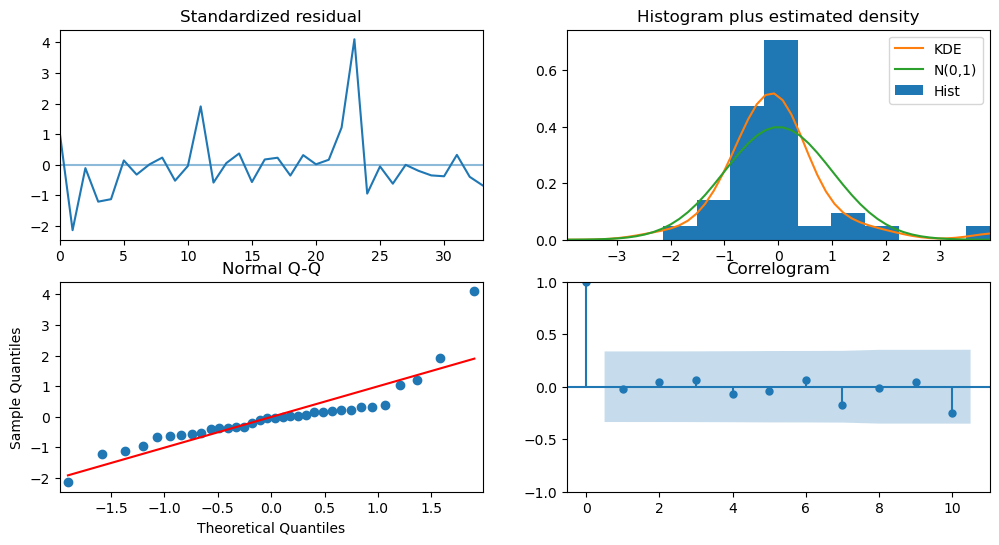

In [35]:
with plt.rc_context():
    plt.rc("figure", figsize=(12, 6))
    model.plot_diagnostics()
    plt.show()

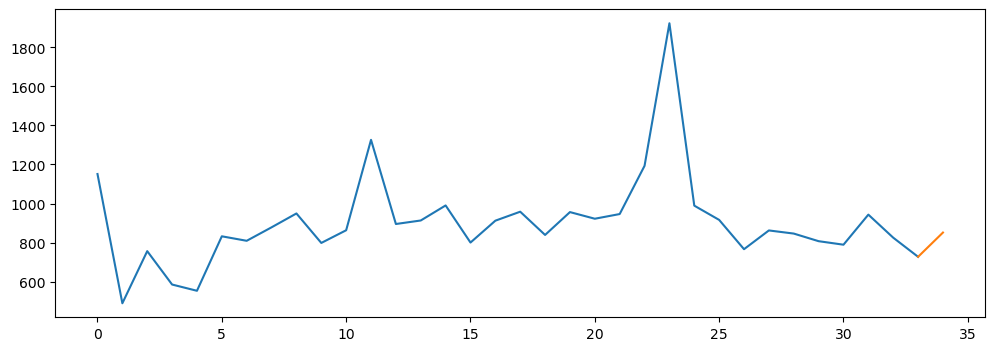

In [50]:
forecast = model.predict(n_periods=int(34 - trial_ex.index[-1]))

with plt.rc_context():
    plt.rc("figure", figsize=(12, 4))
    plt.plot(range(trial_ex.shape[0]), trial_ex['item_cnt_month'])
    plt.plot(range(trial_ex.shape[0] - 1, trial_ex.shape[0] + 34 - trial_ex.index[-1]), 
             [trial_ex['item_cnt_month'].iloc[-1], forecast.iloc[-1]])
    plt.show()

### Prediction

In [31]:
shop_lst = train['shop_id'].unique().tolist()
train_origin = pd.read_csv("./data/sales_train.csv")
per = train_origin.groupby(by=["item_id"])["item_cnt_day"].sum().to_frame(name='item_cnt').reset_index()
col = per["item_cnt"].copy()
per["item_per"] = col / col.sum()
pre_df  = pd.DataFrame(columns=["shop_id", "item_id", "item_cnt_month"])

for i in range(len(shop_lst)):
    trial_ex = trial[trial['shop_id'] == shop_lst[i]].drop(columns=['shop_id'])
    model = auto_arima(trial_ex, start_p=0, start_q=0, start_P=0, start_Q=0)
    forecast = model.predict(n_periods=int(34 - trial_ex.index[-1]))
    try:
        forecast = forecast.iloc[-1]
    except:
        forecast = trial_ex.iloc[0, -1]
    per_example = per[per['item_id'].isin(test.loc[(test['shop_id'] == shop_lst[i]), 'item_id'].unique().tolist())]
    per_example['item_cnt_month'] = per_example['item_per'] * forecast
    per_example['item_cnt_month'] = np.where(per_example['item_cnt_month'] > 20, 20, per_example['item_cnt_month'])
    per_example['item_cnt_month'] = np.where(per_example['item_cnt_month'] < 0, 0, per_example['item_cnt_month'])
    per_example['shop_id'] = shop_lst[i]
    per_example = per_example.drop(columns=["item_per", "item_cnt"])
    pre_df = pd.concat([pre_df, per_example], axis=0)
    
pre_df

/home/fangtian/miniconda3/envs/ann/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/fangtian/miniconda3/envs/ann/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/fangtian/miniconda3/envs/ann/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/fangtian/miniconda3/envs/ann/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  r

,shop_id,item_id,item_cnt_month
30,59,30,0.453507
31,59,31,0.311528
32,59,32,0.454159
33,59,33,0.181490
38,59,38,0.014328
...,...,...,...
21799,36,22162,0.063803
21800,36,22163,0.006846
21801,36,22164,0.045000
21803,36,22166,0.031765


In [35]:
test_arima = pd.merge(test, pre_df, on=['shop_id', 'item_id'], how = "left")
test_arima = test_arima.fillna(value=test_arima['item_cnt_month'].mean())
# test_arima = test_arima.fillna(0)
test_arima 

,ID,shop_id,item_id,item_category_id,date_block_num,price_m,item_cnt_month
0,0,5,5037,19,34,1499.000000,0.428533
1,1,5,5320,55,34,445.207669,0.000000
2,2,5,5233,19,34,1199.000000,0.171076
3,3,5,5232,23,34,1190.433333,0.047577
4,4,5,5268,20,34,445.207669,0.000000
...,...,...,...,...,...,...,...
214195,214195,45,18454,55,34,99.000000,0.087680
214196,214196,45,16188,64,34,1359.000000,0.000678
214197,214197,45,15757,55,34,229.000000,0.062750
214198,214198,45,19648,40,34,89.100000,0.009497


In [36]:
test_arima.isna().sum()

ID                  0
shop_id             0
item_id             0
item_category_id    0
date_block_num      0
price_m             0
item_cnt_month      0
dtype: int64

In [37]:
test_arima = test_arima.loc[:, ['ID', 'item_cnt_month']]
test_arima.to_csv('./results/submission_4.csv', index=False)

## XGBoost

In [2]:
train = pd.read_pickle("./data/train.pkl")
test = pd.read_pickle("./data/test.pkl")
train_y = pd.read_pickle("./data/train_y.pkl")

In [3]:
X_tr = train[train['date_block_num'] < 33]
X_va = train[train['date_block_num'] == 33]
index = X_tr.shape[0]
y_tr = train_y[:index]
y_va = train_y[index:]

In [5]:
# XGBoost
model = xgb.XGBRegressor(n_estimators=5000, 
                         max_depth=10, 
                         early_stopping_rounds=10,
                         eval_metric="rmse",
                         learning_rate=0.1,
                         subsample=0.5,
                         colsample_bytree=0.5)
model.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_va, y_va)], verbose=True)
pred_va = model.predict(X_va)
print(mean_squared_error(y_va, pred_va, squared=False))

[0]	validation_0-rmse:1.18745	validation_1-rmse:1.11812
[1]	validation_0-rmse:1.14012	validation_1-rmse:1.08179
[2]	validation_0-rmse:1.10749	validation_1-rmse:1.05287
[3]	validation_0-rmse:1.07211	validation_1-rmse:1.02660
[4]	validation_0-rmse:1.04202	validation_1-rmse:1.00329
[5]	validation_0-rmse:1.01491	validation_1-rmse:0.98500
[6]	validation_0-rmse:0.99095	validation_1-rmse:0.96999
[7]	validation_0-rmse:0.97168	validation_1-rmse:0.95599
[8]	validation_0-rmse:0.95521	validation_1-rmse:0.94520
[9]	validation_0-rmse:0.94548	validation_1-rmse:0.93899
[10]	validation_0-rmse:0.93116	validation_1-rmse:0.93002
[11]	validation_0-rmse:0.92151	validation_1-rmse:0.92345
[12]	validation_0-rmse:0.91170	validation_1-rmse:0.91826
[13]	validation_0-rmse:0.90513	validation_1-rmse:0.91406
[14]	validation_0-rmse:0.89647	validation_1-rmse:0.90932
[15]	validation_0-rmse:0.88760	validation_1-rmse:0.90639
[16]	validation_0-rmse:0.88141	validation_1-rmse:0.90331
[17]	validation_0-rmse:0.87471	validation

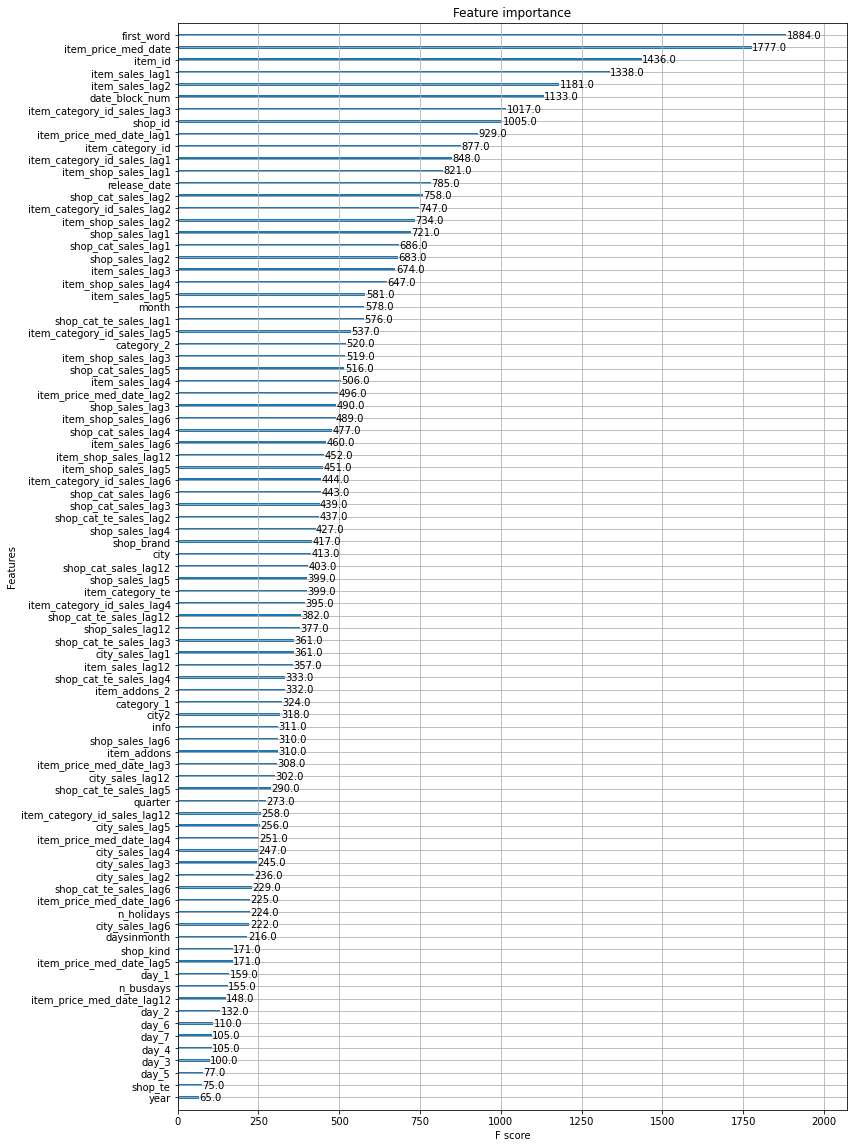

In [7]:
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(model, (12, 20))
plt.show()

In [4]:
# XGBoost: Prediction
model = xgb.XGBRegressor(n_estimators=5000, 
                         max_depth=10, 
                         early_stopping_rounds=10,
                         eval_metric="rmse",
                         learning_rate=0.1,
                         subsample=0.5,
                         colsample_bytree=0.5)
model.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_va, y_va)], verbose=True)
pred = model.predict(test)

[0]	validation_0-rmse:1.18745	validation_1-rmse:1.11812
[1]	validation_0-rmse:1.14012	validation_1-rmse:1.08179
[2]	validation_0-rmse:1.10749	validation_1-rmse:1.05287
[3]	validation_0-rmse:1.07211	validation_1-rmse:1.02660
[4]	validation_0-rmse:1.04202	validation_1-rmse:1.00329
[5]	validation_0-rmse:1.01491	validation_1-rmse:0.98500
[6]	validation_0-rmse:0.99095	validation_1-rmse:0.96999
[7]	validation_0-rmse:0.97168	validation_1-rmse:0.95599
[8]	validation_0-rmse:0.95521	validation_1-rmse:0.94520
[9]	validation_0-rmse:0.94548	validation_1-rmse:0.93899
[10]	validation_0-rmse:0.93116	validation_1-rmse:0.93002
[11]	validation_0-rmse:0.92151	validation_1-rmse:0.92345
[12]	validation_0-rmse:0.91170	validation_1-rmse:0.91826
[13]	validation_0-rmse:0.90513	validation_1-rmse:0.91406
[14]	validation_0-rmse:0.89647	validation_1-rmse:0.90932
[15]	validation_0-rmse:0.88760	validation_1-rmse:0.90639
[16]	validation_0-rmse:0.88141	validation_1-rmse:0.90331
[17]	validation_0-rmse:0.87471	validation

In [15]:
pred_df = pd.Series(pred).to_frame('item_cnt_month').reset_index()
pred_df = pred_df.rename(columns={'index': 'ID'})
pred_df['item_cnt_month'] = pred_df['item_cnt_month'].clip(0, 20)
pred_df

,ID,item_cnt_month
0,0,1.122627
1,1,0.306203
2,2,1.358037
3,3,0.435321
4,4,1.601595
...,...,...
214195,214195,0.635560
214196,214196,0.083465
214197,214197,0.121211
214198,214198,0.209593


In [16]:
pred_df.to_csv('./submission_xgb_new.csv', index=False)

## Model Stacking

In [4]:
# CatBoost 
train_pool = Pool(X_tr, y_tr) 
val_pool = Pool(X_va, y_va) 

model = CatBoostRegressor(early_stopping_rounds=10)
model.fit(train_pool, early_stopping_rounds=10, eval_set=val_pool, use_best_model=True)
pred_va = model.predict(val_pool)
print(mean_squared_error(y_va, pred_va, squared=False))

Learning rate set to 0.218451
0:	learn: 1.1422329	test: 1.0761627	best: 1.0761627 (0)	total: 672ms	remaining: 11m 11s
1:	learn: 1.0854238	test: 1.0362113	best: 1.0362113 (1)	total: 1.22s	remaining: 10m 10s
2:	learn: 1.0458206	test: 1.0078105	best: 1.0078105 (2)	total: 1.85s	remaining: 10m 14s
3:	learn: 1.0191994	test: 0.9890947	best: 0.9890947 (3)	total: 2.38s	remaining: 9m 52s
4:	learn: 0.9997994	test: 0.9796996	best: 0.9796996 (4)	total: 2.9s	remaining: 9m 36s
5:	learn: 0.9847024	test: 0.9686103	best: 0.9686103 (5)	total: 3.55s	remaining: 9m 47s
6:	learn: 0.9743855	test: 0.9618683	best: 0.9618683 (6)	total: 4.12s	remaining: 9m 44s
7:	learn: 0.9672268	test: 0.9581350	best: 0.9581350 (7)	total: 4.77s	remaining: 9m 51s
8:	learn: 0.9617869	test: 0.9547194	best: 0.9547194 (8)	total: 5.44s	remaining: 9m 58s
9:	learn: 0.9574854	test: 0.9530807	best: 0.9530807 (9)	total: 5.91s	remaining: 9m 45s
10:	learn: 0.9531439	test: 0.9486584	best: 0.9486584 (10)	total: 6.56s	remaining: 9m 49s
11:	learn

In [16]:
# LightGBM
model = lgb.LGBMRegressor(n_estimators=5000, early_stopping_rounds=10)
model.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_va, y_va)], verbose=True, eval_metric='rmse')
pred_va = model.predict(X_va)
print(mean_squared_error(y_va, pred_va, squared=False))

/home/fangtian/miniconda3/envs/ann/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[1]	training's rmse: 2.4789	training's l2: 6.14494	valid_1's rmse: 2.45415	valid_1's l2: 6.02285
[2]	training's rmse: 2.39286	training's l2: 5.72576	valid_1's rmse: 2.38593	valid_1's l2: 5.69268
[3]	training's rmse: 2.31897	training's l2: 5.37764	valid_1's rmse: 2.32472	valid_1's l2: 5.40433
[4]	training's rmse: 2.2571	training's l2: 5.09452	valid_1's rmse: 2.28291	valid_1's l2: 5.21166
[5]	training's rmse: 2.20389	training's l2: 4.85714	valid_1's rmse: 2.23355	valid_1's l2: 4.98873
[6]	training's rmse: 2.15913	training's l2: 4.66184	valid_1's rmse: 2.19879	valid_1's l2: 4.83469
[7]	training's rmse: 2.12009	training's l2: 4.49479	valid_1's rmse: 2.17043	valid_1's l2: 4.71078
[8]	training's rmse: 2.08673	training's l2: 4.35445	valid_1's rmse: 2.14943	valid_1's l2: 4.62006
[9]	training's rmse: 2.05785	training's l2: 4.23476	valid_1's rmse: 2.12774	valid_1'

In [ ]:
# Stacking
final_estimator = HistGradientBoostingRegressor()
estimators = [('cat', CatBoostRegressor()),
              ('lgb', lgb.LGBMRegressor(num_iterations=100))]
model = StackingRegressor(estimators=estimators, final_estimator=final_estimator)
model.fit(X_tr, y_tr)
pred_va = model.predict(X_va)
print(f'rmse: {mean_squared_error(y_va, pred_va, squared=False)}.')

Learning rate set to 0.177283
0:	learn: 1.1567576	total: 657ms	remaining: 10m 56s
1:	learn: 1.1059929	total: 1.16s	remaining: 9m 40s
2:	learn: 1.0678417	total: 1.73s	remaining: 9m 36s
3:	learn: 1.0406435	total: 2.24s	remaining: 9m 18s
4:	learn: 1.0193135	total: 2.8s	remaining: 9m 16s
5:	learn: 1.0035942	total: 3.27s	remaining: 9m 2s
6:	learn: 0.9914950	total: 3.81s	remaining: 9m
7:	learn: 0.9824182	total: 4.36s	remaining: 9m 1s
8:	learn: 0.9754923	total: 4.95s	remaining: 9m 5s
9:	learn: 0.9671761	total: 5.7s	remaining: 9m 24s
10:	learn: 0.9622923	total: 6.24s	remaining: 9m 21s
11:	learn: 0.9586416	total: 6.78s	remaining: 9m 17s
12:	learn: 0.9551653	total: 7.35s	remaining: 9m 18s
13:	learn: 0.9520418	total: 7.97s	remaining: 9m 21s
14:	learn: 0.9479654	total: 8.72s	remaining: 9m 32s
15:	learn: 0.9461451	total: 9.26s	remaining: 9m 29s
16:	learn: 0.9431400	total: 10.1s	remaining: 9m 41s
17:	learn: 0.9411542	total: 10.8s	remaining: 9m 46s
18:	learn: 0.9396921	total: 11.4s	remaining: 9m 48s


/root/miniconda3/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
